Target class distribution:
 y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

Confusion Matrix:
 [[9238 1727]
 [ 220 1172]]

Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.84      0.90     10965
         yes       0.40      0.84      0.55      1392

    accuracy                           0.84     12357
   macro avg       0.69      0.84      0.73     12357
weighted avg       0.91      0.84      0.86     12357


Accuracy: 0.8424374848264142


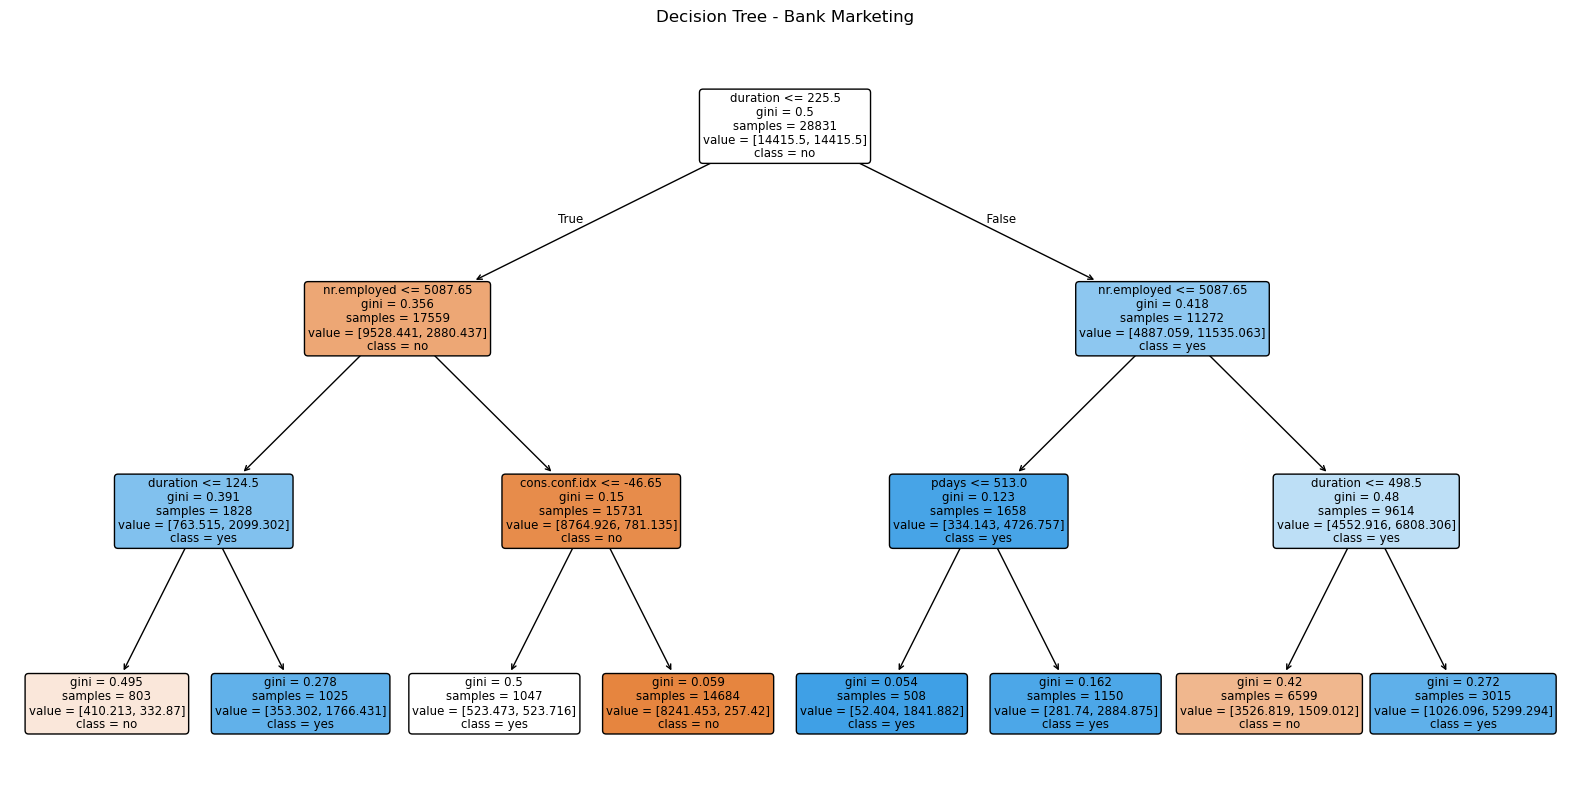

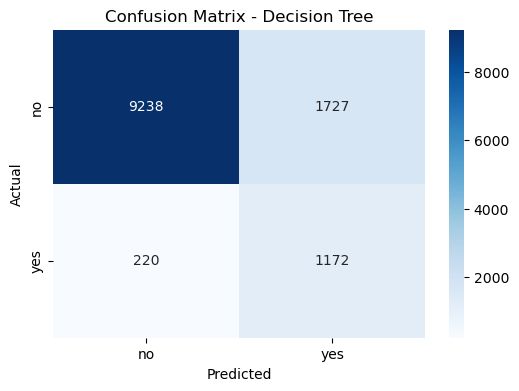

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\asus\Documents\bank-additional\bank-additional\bank-additional-full.csv', sep=';')

label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' and col != 'y':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

target_le = LabelEncoder()
df['y'] = target_le.fit_transform(df['y'])

print("Target class distribution:\n", df['y'].value_counts(normalize=True))

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

clf = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_le.classes_))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=target_le.classes_, filled=True, rounded=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_le.classes_,
            yticklabels=target_le.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

